# Modeling and Simulation in Python

Chapter 25

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import pint
UNITS = pint.UnitRegistry()
Quantity = UNITS.Quantity

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

ValueError: x and y must not be None

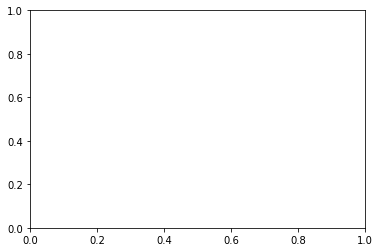

In [3]:
plt.plot(1, 1, None)

In [21]:
meter = UNITS.meter
minute = UNITS.minute
newton = UNITS.newton

<Unit('newton')>

And a few more parameters in the `Params` object.

In [22]:
max_torque = 240 * newton * meter

<Quantity(240.0, 'meter * newton')>

In [23]:
max_rpm = 5500 / minute

<Quantity(5500, '1 / minute')>

In [24]:
def available_torque(rpm):
    if rpm > max_rpm:
        return 0 * newton * meter
    return max_torque * (1 - rpm/max_rpm)

In [25]:
available_torque(0 / minute)

<Quantity(240.0, 'meter * newton')>

In [26]:
rpms = np.linspace(0, max_rpm*1.1, 21) / minute

<Quantity([   0.   302.5  605.   907.5 1210.  1512.5 1815.  2117.5 2420.  2722.5
 3025.  3327.5 3630.  3932.5 4235.  4537.5 4840.  5142.5 5445.  5747.5
 6050. ], '1 / minute')>

In [27]:
taus = [available_torque(rpm) for rpm in rpms]

[<Quantity(240.0, 'meter * newton')>,
 <Quantity(226.79999999999998, 'meter * newton')>,
 <Quantity(213.6, 'meter * newton')>,
 <Quantity(200.39999999999998, 'meter * newton')>,
 <Quantity(187.20000000000002, 'meter * newton')>,
 <Quantity(174.0, 'meter * newton')>,
 <Quantity(160.79999999999998, 'meter * newton')>,
 <Quantity(147.6, 'meter * newton')>,
 <Quantity(134.39999999999998, 'meter * newton')>,
 <Quantity(121.19999999999997, 'meter * newton')>,
 <Quantity(107.99999999999999, 'meter * newton')>,
 <Quantity(94.79999999999998, 'meter * newton')>,
 <Quantity(81.59999999999997, 'meter * newton')>,
 <Quantity(68.39999999999995, 'meter * newton')>,
 <Quantity(55.19999999999997, 'meter * newton')>,
 <Quantity(41.99999999999996, 'meter * newton')>,
 <Quantity(28.799999999999972, 'meter * newton')>,
 <Quantity(15.59999999999996, 'meter * newton')>,
 <Quantity(2.399999999999949, 'meter * newton')>,
 <Quantity(0.0, 'meter * newton')>,
 <Quantity(0.0, 'meter * newton')>]

In [33]:
series = pd.Series(taus, index=rpms.magnitude)

0.0                    240.0 meter * newton
302.5     226.79999999999998 meter * newton
605.0                  213.6 meter * newton
907.5     200.39999999999998 meter * newton
1210.0    187.20000000000002 meter * newton
1512.5                 174.0 meter * newton
1815.0    160.79999999999998 meter * newton
2117.5                 147.6 meter * newton
2420.0    134.39999999999998 meter * newton
2722.5    121.19999999999997 meter * newton
3025.0    107.99999999999999 meter * newton
3327.5     94.79999999999998 meter * newton
3630.0     81.59999999999997 meter * newton
3932.5     68.39999999999995 meter * newton
4235.0     55.19999999999997 meter * newton
4537.5     41.99999999999996 meter * newton
4840.0    28.799999999999972 meter * newton
5142.5     15.59999999999996 meter * newton
5445.0     2.399999999999949 meter * newton
5747.5                   0.0 meter * newton
6050.0                   0.0 meter * newton
dtype: object

ValueError: setting an array element with a sequence.

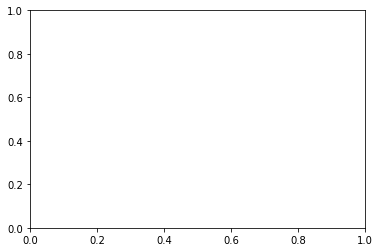

In [34]:
plt.plot(series)
plt.xlabel('Motor speed (rad/s)')
plt.ylabel('Available torque (N m)')